In [96]:
# Notes
# Figure out what the plan is for predictions (What are we trying to predict)
# Work on understanding the data
# Figure out how to build a model to then predict

In [97]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [98]:
# Random State
RANDOM_STATE = 24

In [99]:
# Load data set
url = "https://raw.githubusercontent.com/RobKing2003/StockPrediction/refs/heads/main/berkshire_hathaway_data.csv" 
data = pd.read_csv(url)

meanOpen = np.mean(data["Open"])
meanClose = np.mean(data["Close"])
mean = (meanOpen + meanClose) / 2
highestOpen, highestOpenIndex = np.max(data["Open"]), data["Open"].idxmax()
lowestOpen, lowestOpenIndex = np.min(data["Open"]), data["Open"].idxmin()

atl = np.min(data["Low"]) # All Time Low
ath = np.max(data["High"]) # All Time High

print("Mean Open: ", meanOpen)
print("Mean Close: ", meanClose)
print("Mean: ", mean)
print("Highest Open: ", highestOpen)
print("Lowest Open: ", lowestOpen)

print("Highest Open Index: ", highestOpenIndex)
print("Lowest Open Index: ", lowestOpenIndex)

print("All Time Low: ", atl)
print("All Time High: ", ath)

athIdx = data["High"].idxmax()
atlIdx = data["Low"].idxmin()
athDate = data.loc[athIdx, "Date"]
atlDate = data.loc[atlIdx, "Date"]
print("All Time High Date: ", athDate)
print("All Time Low Date: ", atlDate)

X_features = ["High", "Low"]
y_features = ["Date", "Volume"]
X = data[X_features].values
y = (data["Close"].shift(-1) > data["Close"]).astype(int)

Mean Open:  231.84259954877075
Mean Close:  231.79125002927557
Mean:  231.81692478902318
Highest Open:  445.6199951171875
Lowest Open:  124.11000061035156
Highest Open Index:  2400
Lowest Open Index:  279
All Time Low:  123.5500030517578
All Time High:  449.25
All Time High Date:  2024-07-18
All Time Low Date:  2016-02-03


In [100]:
# Train Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3, # Proportion of the dataset to include in the test split (30% in this case)
    random_state = RANDOM_STATE, # Seed for the random number generator (for reproducibility)
    ## Stratefied sampling to ensure class balance in training and test set
    stratify = y
)

In [101]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1685, 2)
Test set shape: (723, 2)


In [102]:
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = RANDOM_STATE)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

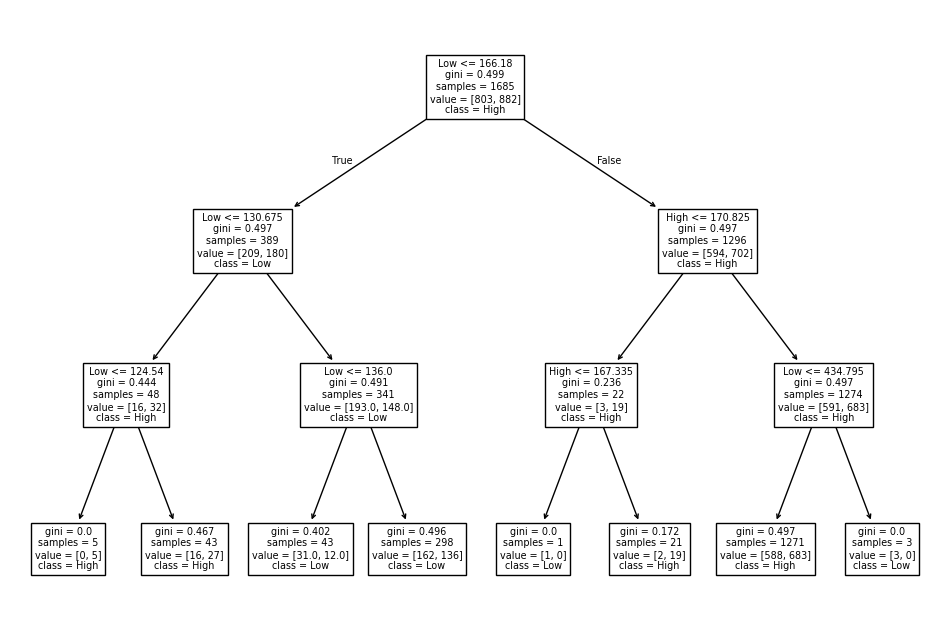

In [103]:
plt.figure(figsize = (12, 8))
tree.plot_tree(tree_clf, feature_names = X_features, class_names=["Low", "High"])
plt.show()